In [3]:
import pandas as pd
import json

# JSON 파일 불러오기
with open('smartfarm_data.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# DataFrame 생성
df = pd.DataFrame(data)

# 아이덴티티 정보만 추출
identity_df = df[['userId', 'facilityId', 'addressName', 'itemCode']]

# 결과 출력
print(identity_df)


           userId      facilityId  addressName itemCode
0     PFS_0000001  PFS_0000001_01     경상남도 사천시   080300
1     PFS_0000002  PFS_0000002_01  전북특별자치도 김제시   080300
2     PFS_0000003  PFS_0000003_01     경상남도 함안군   080300
3     PFS_0000004  PFS_0000004_01     경상남도 진주시   080300
4     PFS_0000005  PFS_0000005_01     경상남도 진주시   132600
...           ...             ...          ...      ...
1392       sk0085       sk0085_01  세종특별자치시 연동면   080300
1393       sk0091       sk0091_01  세종특별자치시 연동면   080300
1394       sk0102       sk0102_01  세종특별자치시 연동면   080300
1395       sk0104       sk0104_01  세종특별자치시 연동면   080300
1396       sk0118       sk0118_01  세종특별자치시 연동면   080300

[1397 rows x 4 columns]


In [18]:
import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False


# 품목별 등록 농가ID

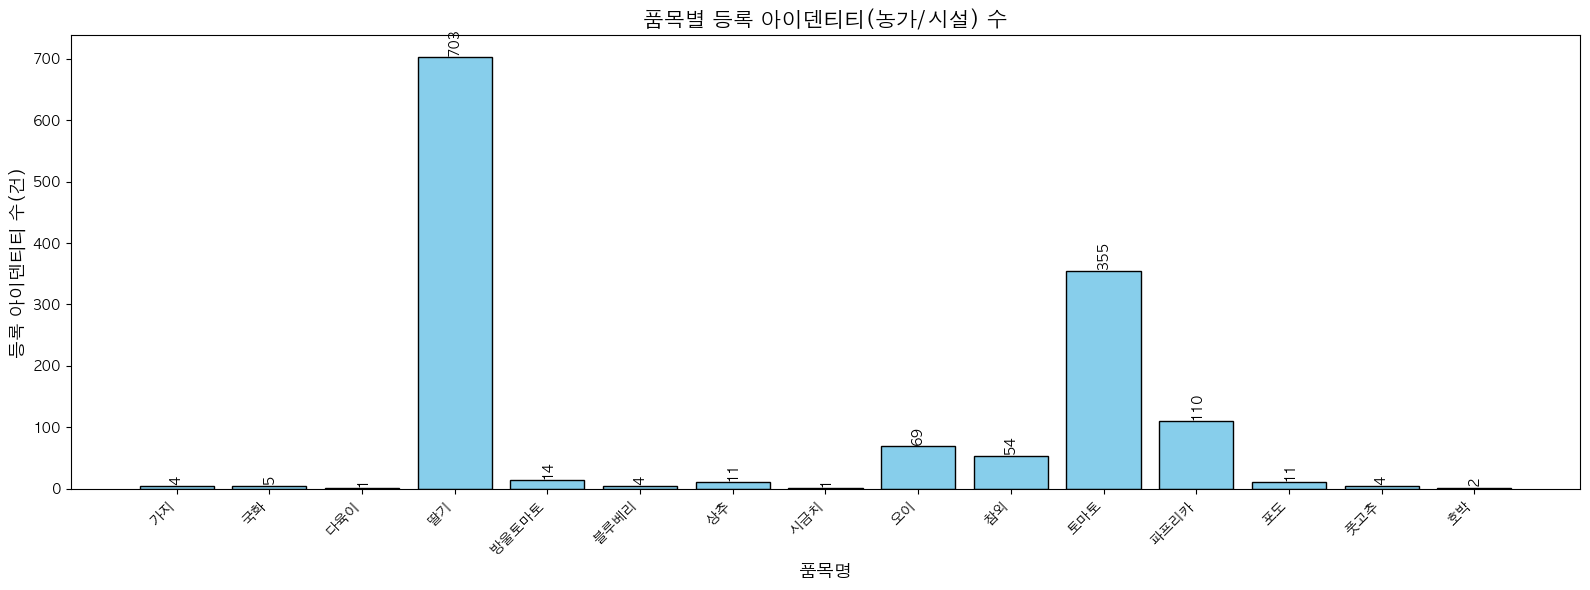

In [13]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'AppleGothic'   # 맥에서는 이 폰트!
plt.rcParams['axes.unicode_minus'] = False    # 마이너스(-) 깨짐 방지

# 명세서 품목코드-품목명 전체(주요) 매핑
item_map = {
    "090300": "가지",
    "26E800": "국화",
    "230000": "다육이",
    "080400": "딸기",
    "080600": "방울토마토",
    "065900": "블루베리",
    "100500": "상추",
    "100800": "시금치",
    "090100": "오이",
    "080200": "참외",
    "080300": "토마토",
    "132600": "파프리카",
    "060300": "포도",
    "120500": "풋고추",
    "090200": "호박",
    # 필요시 전체 코드를 계속 추가
}

# 1. 품목코드별 데이터 개수 집계
count_by_item = identity_df['itemCode'].fillna('').replace(' ', '').value_counts()

# 2. 전체 품목코드(명세서 순서로 정렬)로 그래프를 그리고, 없는 품목도 0으로 보이게
all_item_codes = list(item_map.keys())
item_counts = [count_by_item.get(code, 0) for code in all_item_codes]
labels = [item_map[code] for code in all_item_codes]

# '미등록' 아이템(코드가 누락, 공백, NaN 등)도 별도 집계해서 추가
undefined_count = count_by_item.get('', 0)
if undefined_count > 0:
    labels.append('미등록')
    item_counts.append(undefined_count)

# 3. 그래프 시각화
plt.figure(figsize=(16, 6))
bars = plt.bar(labels, item_counts, color='skyblue', edgecolor='black')
plt.xlabel('품목명', fontsize=13)
plt.ylabel('등록 아이덴티티 수(건)', fontsize=13)
plt.title('품목별 등록 아이덴티티(농가/시설) 수', fontsize=15)
plt.xticks(rotation=45, ha='right')

# 막대 위에 숫자 표시
for bar in bars:
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width()/2., height + 2, f'{int(height)}', ha='center', va='bottom', fontsize=10, rotation=90)

plt.tight_layout()
plt.show()


# 딸기 작기 정보 분포

In [12]:
import pandas as pd
import json

# 파일 읽기
with open('cropping_info.json', encoding='utf-8') as f:
    data = json.load(f)

# 딸기(itemCode: "080400")만 추출
strawberry = [d for d in data if d.get("itemCode") == "080400"]

# DataFrame 생성 (userId를 index로, 나머지 정보는 column)
df = pd.DataFrame(strawberry)
df.set_index("userId", inplace=True)

# 원하는 정보만 추출 (예시)
columns_to_show = [
    "croppingSerlNo", "croppingSeasonName", "croppingDate", "croppingEndDate",
    "croppingSystem", "cultivationArea", "calCultivationArea", "plantNum", "calPlantNum",
    "stemSlabNum", "planSlabNum", "plantDensity", "standardPlantDensity", "floodlightDec",
    "leafArea", "stndTemp", "stndWeight", "stndSolar", "stndMeta"
]
df = df[columns_to_show]

# 결과 출력
print(df)


            croppingSerlNo croppingSeasonName croppingDate croppingEndDate  \
userId                                                                       
PF_0000029              17        설향_20150912   2015-09-12      2016-12-31   
PF_0000030              49        설향_20180915   2018-09-15      2019-06-20   
PF_0000031             223            2016_설향   2016-09-20      2017-09-19   
PF_0000032             231            2016_죽향   2016-09-18      2017-09-17   
PF_0000098             460           2018년_설향   2018-09-14      2019-06-30   
...                    ...                ...          ...             ...   
PF_0025448            8677           2024년_딸기   2024-09-10      2025-05-15   
PF_0025449            8678           2024년_딸기   2024-09-08      2025-05-15   
PF_0025450            8679           2024년_딸기   2024-09-20      2025-05-15   
PF_0025451            8680           2024년_딸기   2024-09-12      2025-05-30   
PF_0025452            8681           2024년_딸기   2024-09-12      

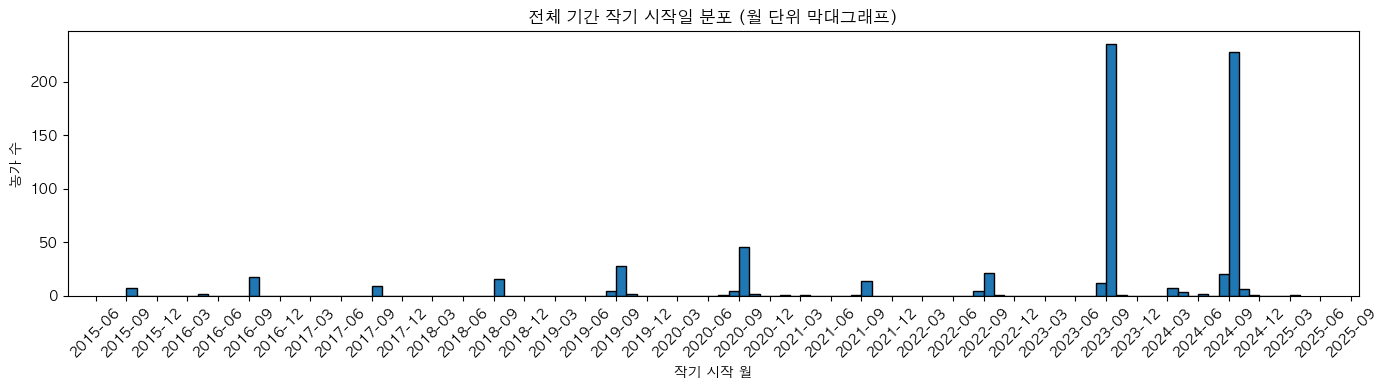

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 날짜 컬럼 변환
df['croppingDate'] = pd.to_datetime(df['croppingDate'], errors='coerce')
df_valid = df.dropna(subset=['croppingDate'])

# 전체 기간에 대해 월 단위 bin 생성
date_min = df_valid['croppingDate'].min().replace(day=1)
date_max = df_valid['croppingDate'].max().replace(day=1) + pd.offsets.MonthBegin(1)
bins = pd.date_range(date_min, date_max, freq='MS')  # MS: month start

plt.figure(figsize=(14, 4))
plt.hist(df_valid['croppingDate'], bins=bins, edgecolor='black')

plt.xlabel('작기 시작 월')
plt.ylabel('농가 수')
plt.title('전체 기간 작기 시작일 분포 (월 단위 막대그래프)')

# x축 눈금을 3, 6, 9, 12월로만
locator = mdates.MonthLocator(bymonth=[3, 6, 9, 12])
formatter = mdates.DateFormatter('%Y-%m')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 딸기 농가 환경데이터(내부온도) 확인

In [31]:
import pandas as pd

# JSON 파일 읽기
df_farm = pd.read_json('smartfarm_data.json')
df_crop = pd.read_json('cropping_info.json')

# 1. 딸기(080400)만 추출
df_farm_straw = df_farm[df_farm['itemCode'] == '080400'][['userId', 'facilityId']]
df_crop_straw = df_crop[df_crop['itemCode'] == '080400'][['userId', 'croppingDate', 'croppingEndDate']]

# 2. userId로만 병합 (inner join)
df_merged = pd.merge(
    df_crop_straw,
    df_farm_straw,
    on='userId',
    how='inner'
)

# 3. 날짜 컬럼 타입 변환
df_merged['croppingDate'] = pd.to_datetime(df_merged['croppingDate'], errors='coerce')
df_merged['croppingEndDate'] = pd.to_datetime(df_merged['croppingEndDate'], errors='coerce')

# 4. 인덱스 리셋
df_merged = df_merged.reset_index(drop=True)

print(df_merged.head())
print('총 농가 수:', df_merged['userId'].nunique())


       userId croppingDate croppingEndDate     facilityId
0  PF_0000029   2015-09-12      2016-12-31  PF_0000029_01
1  PF_0000030   2018-09-15      2019-06-20  PF_0000030_01
2  PF_0000031   2016-09-20      2017-09-19  PF_0000031_01
3  PF_0000032   2016-09-18      2017-09-17  PF_0000032_01
4  PF_0000098   2018-09-14      2019-06-30  PF_0000098_01
총 농가 수: 684


# 실제 내부 온도 데이터가 있는 농가 찾기

In [48]:
import pandas as pd
import requests
from datetime import timedelta
from config import SERVICE_KEY

itemCode = '080400'
fldCode = 'FG'
sectCode = 'EI'
fatrCode = 'TI'

results = []

for idx, row in df_merged.iterrows():
    facility_id = row['facilityId']
    userId = row['userId']
    # NaT 체크!
    if pd.isna(row['croppingDate']):
        continue  # 날짜 없는 농가 건너뜀
    start_date = pd.to_datetime(row['croppingDate'])
    found = False
    for day in range(30):
        measDate = (start_date + timedelta(days=day)).strftime('%Y-%m-%d')
        url = (
            f"http://www.smartfarmkorea.net/Agree_WS/webservices/ProvideRestService/"
            f"getEnvDataList/{SERVICE_KEY}/{facility_id}/{measDate}/{fldCode}/{sectCode}/{fatrCode}/{itemCode}"
        )
        resp = requests.get(url)
        try:
            data = resp.json()
            if isinstance(data, list) and len(data) > 0 and data[0].get('statusCode') == "00":
                results.append({
                    'userId': userId,
                    'facilityId': facility_id,
                    'measDate': measDate,
                    'sample': data[0]
                })
                found = True
                break  # 한 농가의 첫 발견만 저장, 여러 개면 break 삭제
        except Exception:
            print(f"응답 파싱 실패: {measDate}, 내용: {resp.text}")

print(f"데이터가 있는 농가 수: {len(results)}")
df_found = pd.DataFrame(results)
print(df_found.head())


데이터가 있는 농가 수: 321
       userId     facilityId    measDate  \
0  PF_0000030  PF_0000030_01  2018-09-15   
1  PF_0000098  PF_0000098_01  2018-09-14   
2  PF_0000320  PF_0000320_01  2024-10-03   
3  PF_0002037  PF_0002037_01  2024-09-20   
4  PF_0002285  PF_0002285_01  2018-09-17   

                                              sample  
0  {'statusCode': '00', 'statusMessage': 'NORMAL_...  
1  {'statusCode': '00', 'statusMessage': 'NORMAL_...  
2  {'statusCode': '00', 'statusMessage': 'NORMAL_...  
3  {'statusCode': '00', 'statusMessage': 'NORMAL_...  
4  {'statusCode': '00', 'statusMessage': 'NORMAL_...  


In [52]:
import requests
import json
from config import SERVICE_KEY

facility_id = 'PF_0000030_01'
itemCode = '080400'
measDate = '2018-09-15'

url = (
    f"http://www.smartfarmkorea.net/Agree_WS/webservices/ProvideRestService/"
    f"getEnvDataList/{SERVICE_KEY}/{facility_id}/{measDate}/FG/EI/TI/{itemCode}"
)

resp = requests.get(url)
data = resp.json()

# JSON 파일로 저장
with open('PF_0000030_01_2018-09-15_TI.json', 'w', encoding='utf-8') as f:
    json.dump(data, f, ensure_ascii=False, indent=2)

print("저장 완료! 파일명: PF_0000030_01_2018-09-15_TI.json")


저장 완료! 파일명: PF_0000030_01_2018-09-15_TI.json


In [53]:
import requests
import json
import pandas as pd
from datetime import timedelta
from config import SERVICE_KEY

# 1. 농가 정보 (df_merged에서 추출)
row = df_merged[df_merged['userId'] == 'PF_0000030'].iloc[0]
facility_id = row['facilityId']
itemCode = '080400'
start_date = pd.to_datetime(row['croppingDate'])
end_date = pd.to_datetime(row['croppingEndDate'])

# 2. 작기 기간 날짜 리스트 생성
date_list = pd.date_range(start=start_date, end=end_date, freq='D')

# 3. 데이터 요청 및 누적
results = []
for date in date_list:
    measDate = date.strftime('%Y-%m-%d')
    url = (
        f"http://www.smartfarmkorea.net/Agree_WS/webservices/ProvideRestService/"
        f"getEnvDataList/{SERVICE_KEY}/{facility_id}/{measDate}/FG/EI/TI/{itemCode}"
    )
    resp = requests.get(url)
    try:
        data = resp.json()
        # 정상 데이터만 누적 (리스트이므로 extend)
        if isinstance(data, list) and len(data) > 0 and data[0].get('statusCode') == "00":
            results.extend(data)
    except Exception:
        print(f"응답 파싱 실패: {measDate}, 내용: {resp.text}")

# 4. 전체 기간 데이터 JSON 파일로 저장
filename = f'{facility_id}_{start_date.strftime("%Y%m%d")}_{end_date.strftime("%Y%m%d")}_TI.json'
with open(filename, 'w', encoding='utf-8') as f:
    json.dump(results, f, ensure_ascii=False, indent=2)

print(f"저장 완료! 파일명: {filename}, 총 데이터 건수: {len(results)}")


저장 완료! 파일명: PF_0000030_01_20180915_20190620_TI.json, 총 데이터 건수: 5579
